In [799]:
! pip install gym

Project Description:

Deterministic environmet:
Actions: 4 - left, right, top, bottom
States: 16 states (4*4 grid)
Rewards: 
Three positive rewards- Drinking Coffee-0.3, Studying-0.6, End Goal-1
Two Negative rewards- Bunk class- -0.5

Deterministic environmet:
Actions: 5 - left, right, top, bottom, stay in same position
States: 16 states (4*4 grid)
Rewards: 
Three positive rewards- Drinking Coffee-0.3, Studying-0.6, End Goal-1
Two Negative rewards- Bunk class- -0.5


In [800]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
import time
from scipy.stats import binom
from operator import add
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

In [805]:
class GridEnvironment(gym.Env):
    
    def __init__(self):
        self.timestep = 0
#         self.start_pos = [0, 0]
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        
        self.positive_reward_1=[0,3]
        self.positive_reward_2=[2,1]
        self.negative_reward_1=[2,0]
        self.negative_reward_2=[0,2]
        
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.positive_reward_1)] = 0.2
        self.state[tuple(self.positive_reward_2)] = 0.2
        self.state[tuple(self.negative_reward_1)] = 0.1
        self.state[tuple(self.negative_reward_2)] = 0.1
        
        observation = self.state.flatten()
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        
        self.positive_reward_1=[0,3]
        self.positive_reward_2=[2,1]
        self.negative_reward_1=[2,0]
        self.negative_reward_2=[0,2]

        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.positive_reward_1)] = 0.2
        self.state[tuple(self.positive_reward_2)] = 0.2
        self.state[tuple(self.negative_reward_1)] = 0.1
        
        observation = self.state.flatten()
        return observation
    
    def step(self,env_type,action):
        self.state = np.random.choice(self.observation_space.n)
        if(env_type=='D'):
            if action == 0:
                self.agent_pos[0] += 1
            if action == 1:
                self.agent_pos[0] -= 1
            if action == 2:
                self.agent_pos[1] += 1
            if action == 3:
                self.agent_pos[1] -= 1
        else:
            random_value=self.get_random_value_by_probability()
            if action == 0:
                self.agent_pos[0] += random_value
            if action == 1:
                self.agent_pos[0] -= random_value
            if action == 2:
                self.agent_pos[1] += random_value
            if action == 3:
                self.agent_pos[1] -= random_value
                
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.positive_reward_1)] = 0.2
        self.state[tuple(self.positive_reward_2)] = 0.2
        self.state[tuple(self.negative_reward_1)] = 0.1
        self.state[tuple(self.negative_reward_2)] = 0.1

        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 1
        elif (self.agent_pos == self.positive_reward_1).all():
            reward=0.6
        elif (self.agent_pos == self.positive_reward_2).all():
            reward=0.3
        elif(self.agent_pos == self.negative_reward_1).all():
            reward= -0.5
        elif(self.agent_pos == self.negative_reward_2).all():
            reward= -0.5
            
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False
        
        info = {}
        
        return observation, reward, done, info
    
    def get_random_value_by_probability(self):
        x=np.random.randint(0, 10)
        print(x,"::::")
        random_value=0
        if x <= 6:
            random_value=1
        return random_value
    
    def render(self):
        plt.imshow(self.state)
        
    def render2(self,mode='human',plot=False):
        fig,ax=plt.subplots(figsize=(10,10))
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
                
        agent = AnnotationBbox(OffsetImage(plt.imread('./images/robot/Robot_pos1.png'), zoom=0.4),  # Plotting the agent.
                           list(map(add, self.agent_pos, [0.5, 0.5])), frameon=False)
        ax.add_artist(agent)
        
        if (self.agent_pos == self.goal_pos).all():
            goal = AnnotationBbox(OffsetImage(plt.imread('./images/robot1/grad.png'), zoom=0.12),  # Plotting the agent.
                           list(map(add, self.goal_pos, [0.5, 0.5])), frameon=False)
            agent.remove()
        else:
            goal = AnnotationBbox(OffsetImage(plt.imread('./images/RL-696x309.png'), zoom=0.2),  # Plotting the agent.
                           list(map(add, self.goal_pos, [0.5, 0.5])), frameon=False)
        ax.add_artist(goal)
        
        if(self.agent_pos == self.negative_reward_1).all():
            negative_rw_1 = AnnotationBbox(OffsetImage(plt.imread('./images/robot1/Conf_bunk.png'), zoom=0.11),  # Plotting the agent.
                           list(map(add, self.negative_reward_1, [0.5, 0.5])), frameon=False)
            agent.remove()
        else:
            negative_rw_1 = AnnotationBbox(OffsetImage(plt.imread('./images/bunk.jpeg'), zoom=0.4),  # Plotting the agent.
                           list(map(add, self.negative_reward_1, [0.5, 0.5])), frameon=False)
        ax.add_artist(negative_rw_1)
        
        if(self.agent_pos == self.negative_reward_2).all():
            negative_rw_2 = AnnotationBbox(OffsetImage(plt.imread('./images/robot1/Conf_bunk.png'), zoom=0.11),  # Plotting the agent.
                           list(map(add, self.negative_reward_2, [0.5, 0.5])), frameon=False)
            agent.remove()
        else:
            negative_rw_2 = AnnotationBbox(OffsetImage(plt.imread('./images/bunk.jpeg'), zoom=0.4),  # Plotting the agent.
                           list(map(add, self.negative_reward_2, [0.5, 0.5])), frameon=False)
        ax.add_artist(negative_rw_2)
        
        if(self.agent_pos == self.positive_reward_1).all():
            positive_rw_1 = AnnotationBbox(OffsetImage(plt.imread('./images/robot1/assignment.png'), zoom=0.21),  # Plotting the agent.
                           list(map(add, self.positive_reward_1, [0.5, 0.5])), frameon=False)
            agent.remove()
        else:
            positive_rw_1 = AnnotationBbox(OffsetImage(plt.imread('./images/robot1/books.png'), zoom=0.15),  # Plotting the agent.
                           list(map(add, self.positive_reward_1, [0.5, 0.5])), frameon=False)
        ax.add_artist(positive_rw_1)
        
        if(self.agent_pos == self.positive_reward_2).all():
            positive_rw_2 = AnnotationBbox(OffsetImage(plt.imread('./images/robot1/robot_coffee_final.png'), zoom=0.25),  # Plotting the agent.
                           list(map(add, self.positive_reward_2, [0.5, 0.5])), frameon=False)
            agent.remove()
        else:
            positive_rw_2 = AnnotationBbox(OffsetImage(plt.imread('./images/coffee.png'), zoom=0.15),  # Plotting the agent.
                           list(map(add, self.positive_reward_2, [0.5, 0.5])), frameon=False)
        ax.add_artist(positive_rw_2)
        
        ax.set_xticks(np.arange(0, 4, 1))
        ax.set_yticks(np.arange(0, 4, 1))

        plt.grid(fig, linewidth=1,which='both', axis='both')
    

In [806]:
env = GridEnvironment()
obs = env.reset()

REWARD::  0


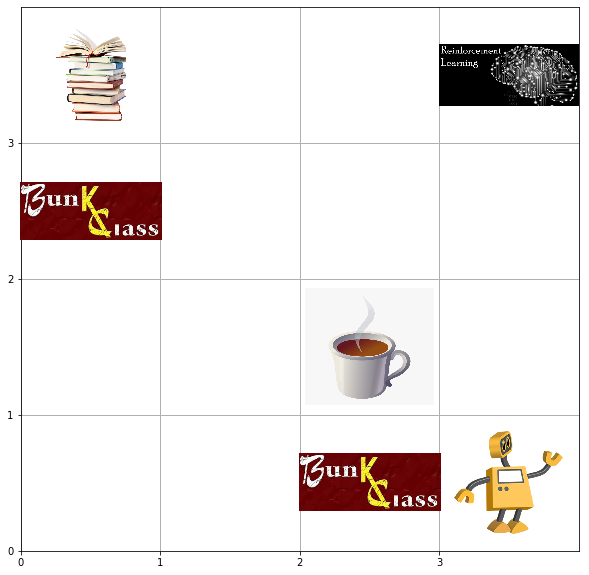

In [812]:
# obs = env.reset()
#0- right, 1-left, 2- up,3-down
while True:
    x=np.random.randint(0, 4)
    observation, reward, done, _ = env.step('D',x)
    if done==True:
        break
        
print("REWARD:: ",reward)
# env.render()
env.render2()